In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification


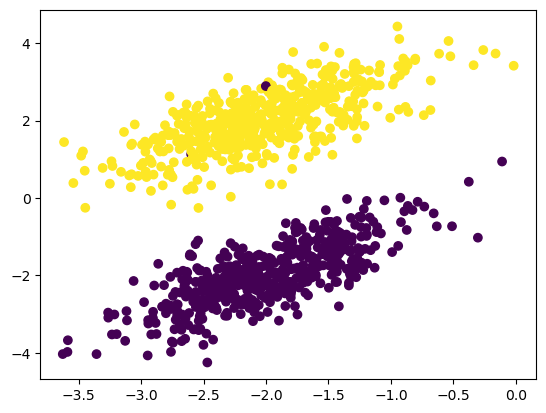

In [2]:
X, y = make_classification(n_samples=1000,
                  n_features=2, 
                  n_classes=2,
                  n_clusters_per_class=1,
                  n_redundant=0,
                  class_sep=2.0, 
                  random_state=12)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [38]:
class Hebb:
    def __init__(self, n_features: int = 2, n_iter=5, C=1.0):
        self.weights = np.random.randn(n_features, 1)
        self.bias = np.zeros((1, 1))
        self.n_iter = n_iter
        self.C = C
        
        
    
    def forward(self, x):
        return (x @ self.weights) + self.bias
    
    def predict(self, x):
        z = self.forward(x)
        y_hat = np.sign(z)
        return y_hat.ravel()
    
    def fit(self, x, y=None, supervised=True):
        if y is not None:
            y = np.where(y > 0, 1.0, -1.0).astype(np.int_)
            # plot_decision_regions(X, y, clf=self)
        plt.show()
        plt.clf()
        for iter in range(self.n_iter):
            y_hat = self.predict(x)
            
            if supervised:
                w_diff = x.T @ y[..., np.newaxis] * self.C
                b_diff = np.sum(y[..., np.newaxis], axis=0)  * self.C

                loss = (y - y_hat) / 2
                if iter % 10 == 0:
                    print(f"Iteration {iter + 1}, Loss : {sum(np.abs(loss)):.4}")

            else:
                w_diff = x.T @ y_hat[..., np.newaxis] * self.C
                b_diff = np.sum(y_hat[..., np.newaxis], axis=0)  * self.C
            
            self.weights = self.weights + w_diff
            self.bias = self.bias + b_diff
            
        
        print("=" * 50)
        if supervised: 
            plot_decision_regions(X, y, clf=self)
        else:
            plt.scatter(X[:, 0], X[:, 1], c=((y_hat + 1) // 2).astype(np.int_))
            
            
        

        
    

Iteration 1, Loss : 960.0
Iteration 11, Loss : 8.0
Iteration 21, Loss : 8.0
Iteration 31, Loss : 8.0
Iteration 41, Loss : 8.0
Iteration 51, Loss : 8.0
Iteration 61, Loss : 8.0
Iteration 71, Loss : 8.0
Iteration 81, Loss : 8.0
Iteration 91, Loss : 8.0
Iteration 101, Loss : 8.0
Iteration 111, Loss : 8.0
Iteration 121, Loss : 8.0
Iteration 131, Loss : 8.0
Iteration 141, Loss : 8.0
Iteration 151, Loss : 8.0
Iteration 161, Loss : 8.0
Iteration 171, Loss : 8.0
Iteration 181, Loss : 8.0
Iteration 191, Loss : 8.0
Iteration 201, Loss : 8.0
Iteration 211, Loss : 8.0
Iteration 221, Loss : 8.0
Iteration 231, Loss : 8.0
Iteration 241, Loss : 8.0
Iteration 251, Loss : 8.0
Iteration 261, Loss : 8.0
Iteration 271, Loss : 8.0
Iteration 281, Loss : 8.0
Iteration 291, Loss : 8.0
Iteration 301, Loss : 8.0
Iteration 311, Loss : 8.0
Iteration 321, Loss : 8.0
Iteration 331, Loss : 8.0
Iteration 341, Loss : 8.0
Iteration 351, Loss : 8.0
Iteration 361, Loss : 8.0
Iteration 371, Loss : 8.0
Iteration 381, Loss :

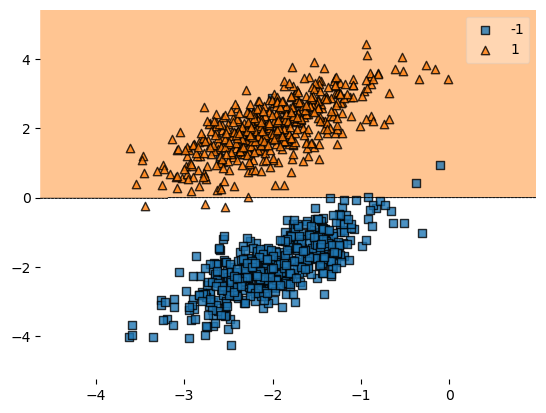

In [42]:
hebb = Hebb(n_iter=1000, C=50.0)
hebb.fit(x=X, y=y, supervised=True)

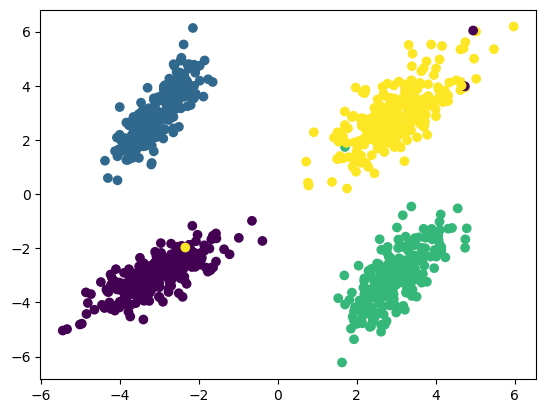

In [43]:
X, y = make_classification(n_samples=1000,
                  n_features=2, 
                  n_classes=4,
                  n_clusters_per_class=1,
                  n_redundant=0,
                  class_sep=3.0, 
                  random_state=12)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [52]:
class MultiClassHebb:
    def __init__(self, n_features: int = 2, n_classes: int = 4, n_iter=100, C=1.0):
        self.weights = np.random.randn(n_features, n_classes)
        self.bias = np.zeros((1, n_classes))
        self.n_iter = n_iter
        self.n_classes = n_classes
        self.C = C
        
        
    def argmax(self, z):
        return np.argmax(z, axis=-1)
    
    def one_hot(self, y):
        one_hot = np.ones((y.size, self.n_classes)) * -1
        one_hot[np.arange(y.size), y] = 1
        return one_hot
    
    def forward(self, x):
        return (x @ self.weights) + self.bias
    
    def predict(self, x):
        z = self.forward(x)
        y_hat = self.argmax(z)
        return y_hat
    
    def fit(self, x, y=None, supervised=True):
        if y is not None:
            y = self.one_hot(y)
            # plot_decision_regions(X, y, clf=self)
        plt.show()
        plt.clf()
        for iter in range(self.n_iter):
            y_hat = self.predict(x)
            y_hat = self.one_hot(y_hat)
            
            if supervised:
                w_diff = x.T @ y * self.C
                b_diff = np.sum(y, axis=0, keepdims=True) * self.C

                loss = (y - y_hat) / 2
                if iter % 10 == 0:
                    print(f"Iteration {iter + 1}, Loss : {np.sum(np.abs(loss)):.4}")

            else:
                w_diff = x.T @ y_hat * self.C
                b_diff = np.sum(y_hat, axis=0, keepdims=True) * self.C
            
            self.weights = self.weights + w_diff
            self.bias = self.bias + b_diff
            
        
        print("=" * 50)
        if supervised: 
            plot_decision_regions(X, y.argmax(axis=-1), clf=self)
        else:
            plt.scatter(X[:, 0], X[:, 1], c=y_hat.argmax(axis=-1))
            
            
        


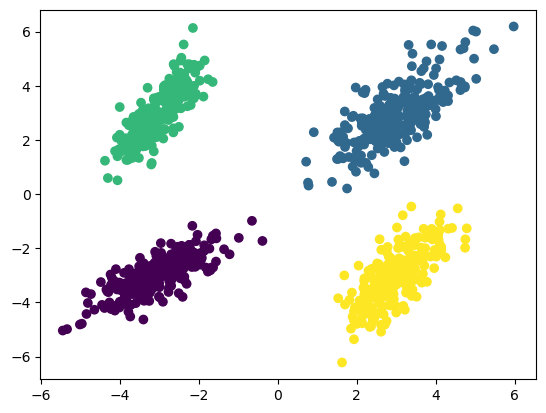

In [63]:
hebb = MultiClassHebb(n_iter=1000, C=1.0)
hebb.fit(x=X, y=y, supervised=False)

In [64]:
hebb.predict(X)

array([1, 1, 1, 3, 0, 1, 0, 0, 1, 0, 3, 2, 2, 1, 3, 3, 2, 1, 3, 3, 0, 0,
       1, 3, 0, 0, 2, 1, 3, 1, 2, 0, 1, 1, 3, 2, 3, 0, 0, 0, 2, 3, 2, 3,
       3, 3, 1, 2, 1, 1, 1, 2, 2, 0, 0, 3, 1, 1, 3, 0, 3, 3, 1, 2, 0, 0,
       3, 1, 0, 3, 3, 1, 3, 0, 2, 0, 3, 2, 2, 1, 1, 1, 1, 0, 3, 2, 3, 0,
       2, 2, 2, 2, 2, 3, 3, 0, 2, 0, 2, 0, 3, 2, 1, 0, 0, 3, 2, 0, 2, 2,
       1, 2, 1, 3, 0, 2, 2, 2, 1, 0, 3, 2, 1, 0, 1, 3, 3, 3, 2, 3, 3, 3,
       2, 1, 2, 3, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 3, 0, 2, 0, 1, 1, 3, 2,
       0, 0, 2, 0, 0, 2, 0, 3, 2, 1, 3, 0, 2, 2, 0, 1, 0, 3, 1, 0, 2, 1,
       3, 1, 1, 3, 2, 2, 0, 1, 2, 1, 0, 2, 3, 3, 2, 3, 3, 3, 1, 1, 3, 0,
       2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 2, 0, 1, 1, 1, 0,
       3, 3, 3, 1, 2, 1, 3, 3, 0, 3, 3, 0, 2, 2, 1, 3, 2, 0, 2, 1, 3, 0,
       1, 2, 1, 2, 2, 2, 3, 1, 1, 3, 0, 0, 3, 3, 2, 0, 1, 1, 3, 2, 3, 2,
       1, 3, 0, 1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 3, 2, 0, 3, 0, 2, 0,
       0, 1, 1, 2, 1, 3, 1, 3, 0, 1, 1, 2, 0, 0, 3,

Iteration 1, Loss : 1.994e+03
Iteration 11, Loss : 8.0
Iteration 21, Loss : 8.0
Iteration 31, Loss : 8.0
Iteration 41, Loss : 8.0
Iteration 51, Loss : 8.0
Iteration 61, Loss : 8.0
Iteration 71, Loss : 8.0
Iteration 81, Loss : 8.0
Iteration 91, Loss : 8.0
Iteration 101, Loss : 8.0
Iteration 111, Loss : 8.0
Iteration 121, Loss : 8.0
Iteration 131, Loss : 8.0
Iteration 141, Loss : 8.0
Iteration 151, Loss : 8.0
Iteration 161, Loss : 8.0
Iteration 171, Loss : 8.0
Iteration 181, Loss : 8.0
Iteration 191, Loss : 8.0
Iteration 201, Loss : 8.0
Iteration 211, Loss : 8.0
Iteration 221, Loss : 8.0
Iteration 231, Loss : 8.0
Iteration 241, Loss : 8.0
Iteration 251, Loss : 8.0
Iteration 261, Loss : 8.0
Iteration 271, Loss : 8.0
Iteration 281, Loss : 8.0
Iteration 291, Loss : 8.0
Iteration 301, Loss : 8.0
Iteration 311, Loss : 8.0
Iteration 321, Loss : 8.0
Iteration 331, Loss : 8.0
Iteration 341, Loss : 8.0
Iteration 351, Loss : 8.0
Iteration 361, Loss : 8.0
Iteration 371, Loss : 8.0
Iteration 381, Lo

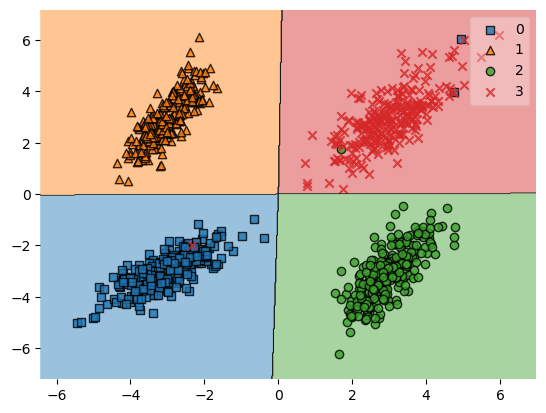

In [65]:
hebb = MultiClassHebb(n_iter=1000, C=1.0)
hebb.fit(x=X, y=y, supervised=True)